# Лабораторная работа №7.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [53]:
# Матрица Харалика d=1, phi = {0, 90, 180, 270}
def co_occurance_matrix(img):
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    #оценка общего числа соседств
    k = 4 * rows * cols - 2 * rows - 2 * cols
    
    glcm = np.zeros((256, 256), dtype=int)
    
    # direction 90, up
    for i in range(1, rows):
        for j in range(0, cols):
            glcm[arr[i, j], arr[i-1, j]] += 1
            
    # direction 270, down
    for i in range(0, rows - 1):
        for j in range(0, cols):
            glcm[arr[i, j], arr[i+1, j]] += 1
            
    # direction 0, right
    for i in range(0, rows):
        for j in range(0, cols - 1):
            glcm[arr[i, j], arr[i, j+1]] += 1
            
    # direction 180, left
    for i in range(0, rows):
        for j in range(1, cols):
            glcm[arr[i, j], arr[i, j-1]] += 1
    
    glcm = glcm.astype(np.uint8)
    img_res = Image.fromarray(glcm)
    return img_res

In [12]:
# статические признаки ASM, MPR, ENT,TR
def static_features(glcm):
    arr = np.asarray(glcm)   
    rows, cols = arr.shape
    
    asm = 0
    for i in range(rows):
        for j in range(cols):
            asm += arr[i][j]^2
    
    mpr = arr[0][0]
    for i in range(rows):
        for j in range(cols):
            if arr[i][j] > mpr:
                mpr = arr[i][j]
                
    ent = 0
    for i in range(rows):
        for j in range(cols):
            if arr[i][j] > 0:
                ent += arr[i][j] * math.log2(arr[i][j])
    ent = ent * (-1)
    
    tr = 0
    for i in range(rows):
        tr += arr[i][i]
        
    return asm, mpr, ent, tr

In [13]:
def num_round(a):
    if (a - math.floor(a)) >= 0.75:
        return math.floor(a) + 1
    else:
        return math.floor(a)

In [14]:
def img_brightness_change(img, change):
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    for i in range(rows):
        for j in range(cols):
            new = change[arr[i][j]]
            arr[i][j] = new
    
    arr = arr.astype(np.uint8)
    img_res = Image.fromarray(arr)
    return img_res

In [15]:
def histogram_equalization(img):
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    print('Гистограмма исходного изображения:')
    counts, bins, patches = plt.hist(arr.ravel(),256,[0,256])#ravel - возвращает сплющенный массив
    plt.show()
    
    n = int(rows * cols / 256)
    
    prev_sum = 0
    curr_sum = 0
    new_counts = []
    result = np.zeros(256)
    for x in range(len(counts)):
        if counts[x] >= n and prev_sum == 0:
            new_counts.append(counts[x])
            result[x] = len(new_counts)
            #k = round(counts[x] / n)
            k = num_round(counts[x] / n)
            for i in range(k - 1):
                new_counts.append(0)
        else:
            curr_sum = prev_sum + counts[x]
            if abs(prev_sum - n) < abs(curr_sum - n):
                new_counts.append(prev_sum)
                result[x] = len(new_counts)
                #k = round(prev_sum / n)
                k = num_round(prev_sum / n)
                for i in range(k - 1):
                    new_counts.append(0)
                prev_sum = counts[x]
            else:
                prev_sum = curr_sum
                result[x] = len(new_counts)
                
    if prev_sum != 0:
        new_counts.append(prev_sum)
        #k = round(prev_sum / n)
        k = num_round(prev_sum / n)
        for i in range(k - 1):
            new_counts.append(0)
    else:
        new_counts.append(counts[x])
        #k = round(counts[x] / n)
        k = num_round(counts[x] / n)
        for i in range(k - 1):
            new_counts.append(0)
    
    
    print('Гистограмма яркостного изображения:')
    print('Средний уровень яркости - ', n)
    print('Количество уровней яркостей - ', len(new_counts))
    x = [*range(0, len(new_counts))]
    plt.bar(x, new_counts)
    plt.show()   
    
    return img_brightness_change(img, result)

In [50]:
arr = []
print(len(arr))

0


### Пример 1.

In [3]:
img1 = Image.open("lab7_1.bmp").convert('L')

In [4]:
img1.save('lab7_1.bmp')

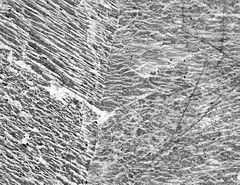

In [48]:
img1

In [54]:
res_img1 = co_occurance_matrix(img1)

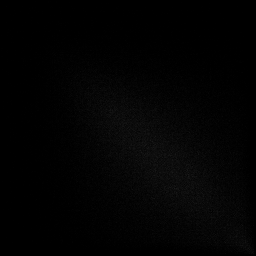

In [55]:
res_img1

In [16]:
asm1, mpr1, ent1, tr1 = static_features(res_img1)
print(' Энергия (ASM): ', asm1, '\n', 'Максимальная вероятность (MPR): ', mpr1, '\n', 'Энтропия (ENT): ', ent1, '\n', 'След (TR): ', tr1)

 Энергия (ASM):  4277084 
 Максимальная вероятность (MPR):  226 
 Энтропия (ENT):  -30370490.83137758 
 След (TR):  24440


Гистограмма исходного изображения:


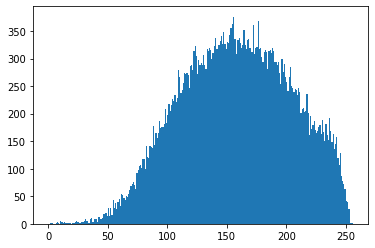

Гистограмма яркостного изображения:
Средний уровень яркости -  173
Количество уровней яркостей -  236


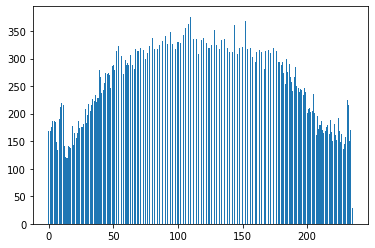

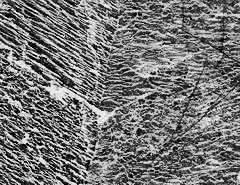

In [17]:
# окргуление по правилам
histogram_equalization(img1)

Гистограмма исходного изображения:


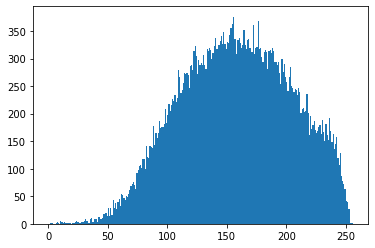

Гистограмма яркостного изображения:
Средний уровень яркости -  173
Количество уровней яркостей -  236


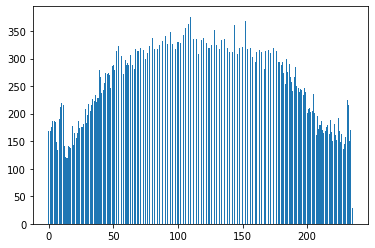

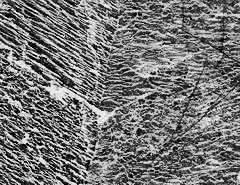

In [18]:
# округление вниз
histogram_equalization(img1)

Гистограмма исходного изображения:


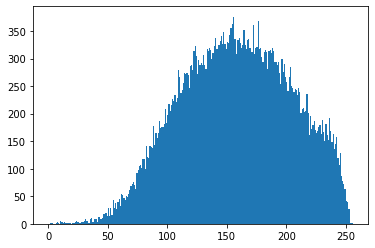

Гистограмма яркостного изображения:
Средний уровень яркости -  173
Количество уровней яркостей -  236


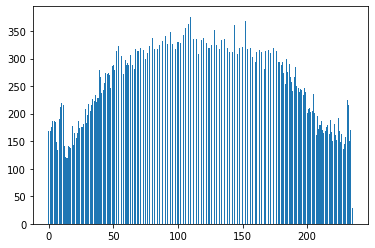

In [19]:
# округление по 0.75
br_img_res1 = histogram_equalization(img1)

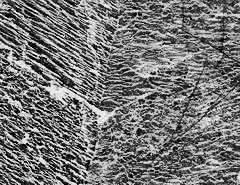

In [20]:
br_img_res1

In [21]:
br_img_res1.save('lab7_1_res.bmp')

In [22]:
br_res_img1 = co_occurance_matrix(br_img_res1,2)

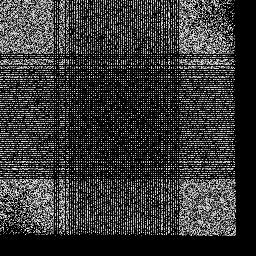

In [23]:
br_res_img1

### Пример 2.

In [11]:
img2 = Image.open("lab7_2.bmp").convert('L')

In [66]:
img2.save("lab7_2.bmp")

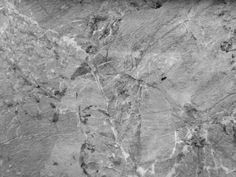

In [12]:
img2

In [13]:
res_img2 = co_occurance_matrix(img2)

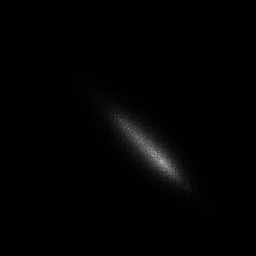

In [14]:
res_img2

In [15]:
asm2, mpr2, ent2, tr2 = static_features(res_img2)
print(' Энергия (ASM): ', asm2, '\n', 'Максимальная вероятность (MPR): ', mpr2, '\n', 'Энтропия (ENT): ', ent2, '\n', 'След (TR): ', tr2)

 Энергия (ASM):  276482 
 Максимальная вероятность (MPR):  176 
 Энтропия (ENT):  -867087.6365057611 
 След (TR):  6706


Гистограмма исходного изображения:


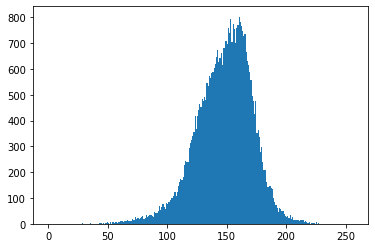

Гистограмма яркостного изображения:
Средний уровень яркости -  163
Количество уровней яркостей -  241


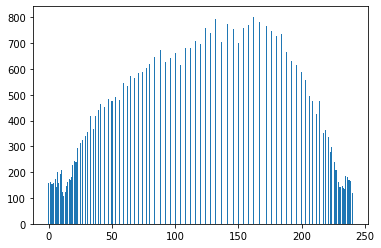

In [56]:
# округление по 0.75
br_img_res2 = histogram_equalization(img2)

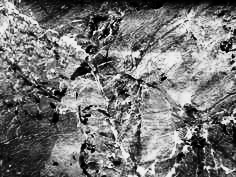

In [57]:
br_img_res2 

In [67]:
br_img_res2.save('lab7_2_res.bmp')

In [68]:
br_res_img2 = co_occurance_matrix(br_img_res2)

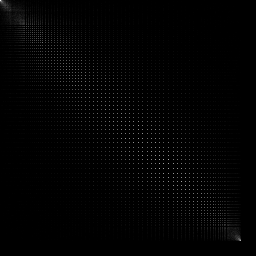

In [69]:
br_res_img2

### Пример 3.

In [17]:
img3 = Image.open("lab7_3.bmp").convert('L')

In [70]:
img3.save('lab7_3.bmp')

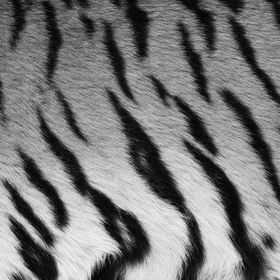

In [18]:
img3

In [19]:
res_img3 = co_occurance_matrix(img3)

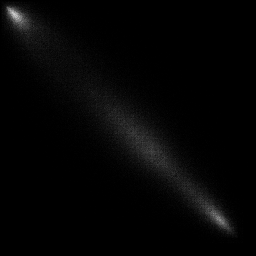

In [20]:
res_img3

In [21]:
asm3, mpr3, ent3, tr3 = static_features(res_img3)
print(' Энергия (ASM): ', asm3, '\n', 'Максимальная вероятность (MPR): ', mpr3, '\n', 'Энтропия (ENT): ', ent3, '\n', 'След (TR): ', tr3)

 Энергия (ASM):  397816 
 Максимальная вероятность (MPR):  204 
 Энтропия (ENT):  -1425451.3141969647 
 След (TR):  10368


Гистограмма исходного изображения:


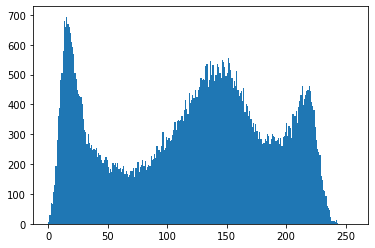

Гистограмма яркостного изображения:
Средний уровень яркости -  306
Количество уровней яркостей -  224


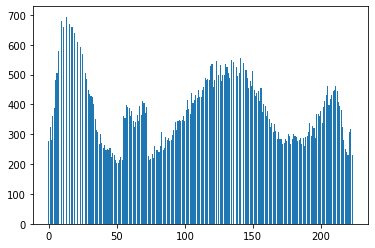

In [58]:
# округление по 0.75
br_img_res3 = histogram_equalization(img3)

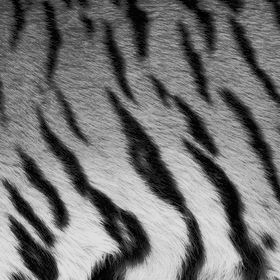

In [59]:
br_img_res3

In [71]:
br_img_res3.save('lab7_3_res.bmp')

In [72]:
br_res_img3 = co_occurance_matrix(br_img_res3)

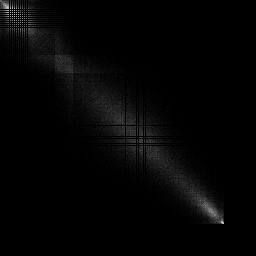

In [73]:
br_res_img3

### Пример 4.

In [22]:
img4 = Image.open("lab7_4.bmp").convert('L')

In [74]:
img4.save("lab7_4.bmp")

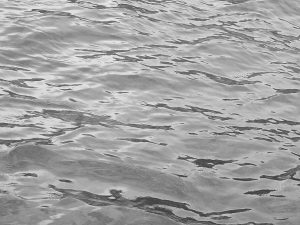

In [23]:
img4

In [24]:
res_img4 = co_occurance_matrix(img4)

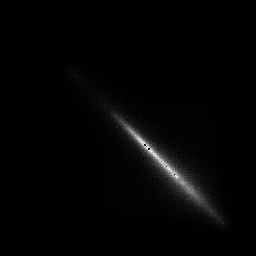

In [25]:
res_img4

In [26]:
asm4, mpr4, ent4, tr4 = static_features(res_img4)
print(' Энергия (ASM): ', asm4, '\n', 'Максимальная вероятность (MPR): ', mpr4, '\n', 'Энтропия (ENT): ', ent4, '\n', 'След (TR): ', tr4)

 Энергия (ASM):  360838 
 Максимальная вероятность (MPR):  252 
 Энтропия (ENT):  -1437177.0876104967 
 След (TR):  14136


Гистограмма исходного изображения:


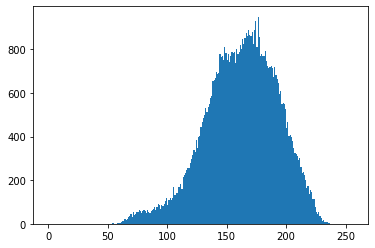

Гистограмма яркостного изображения:
Средний уровень яркости -  263
Количество уровней яркостей -  238


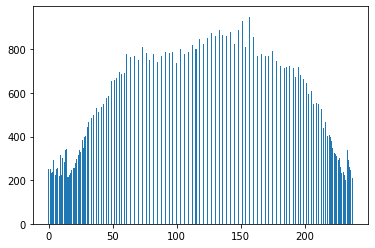

In [60]:
# округление по 0.75
br_img_res4 = histogram_equalization(img4)

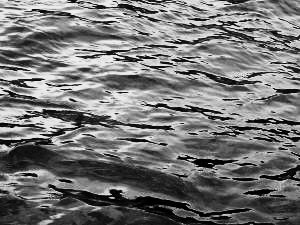

In [61]:
br_img_res4

In [75]:
br_img_res4.save('lab7_4_res.bmp')

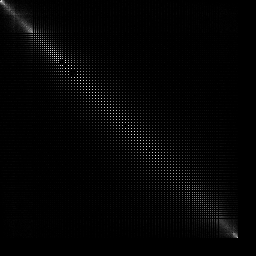

In [76]:
co_occurance_matrix(br_img_res4)